# Trabajo Práctico de Laboratorio N° 1
> ## Alumno: Fabrizio Hermosa
> ## Grupo: E
> ## Materia: Teoría de los circuitos II
> ## Curso: R4001

## <u>Consigna</u>
El trabajo práctico consiste en el diseño, análisis, medición y discusión de un filtro activo.
En el caso de mi grupo, fue la siguiente plantilla:
<center>

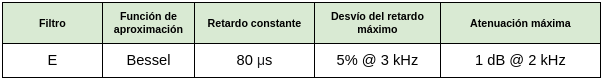

Figura 1: Plantilla del filtro requerido
</center>

Se trata de un filtro Bessel con un delay de grupo constante en la banda de paso de $80\mu s$, un desvío máximo del delay del 5% a 3KHz y una atenuación máxima de 1dB a 2KHz.

## <u>Desarrollo</u>
El primer paso del diseño fue hallar la transferencia, para ésto se realizaron las siguientes cuentas:

$$f_{1} = 3KHz$$
$$f_{2} = 2KHz$$

$$\tau(0) = D = 80\mu s$$

$$\Omega_{\omega} = \frac{1}{D} = 12,5K \frac{rad}{s}$$

$$\omega_{1}' = \frac{2\pi f_{1}}{\Omega_{\omega}} = 1,5$$ 
$$\omega_{2}' = \frac{2\pi f_{2}}{\Omega_{\omega}} = 1$$ 

En base a $\omega_{1}'$ (delay error) y $\omega_{2}'$ (alfa máximo) se averigua el orden del filtro mediante el uso de tablas:

<center>

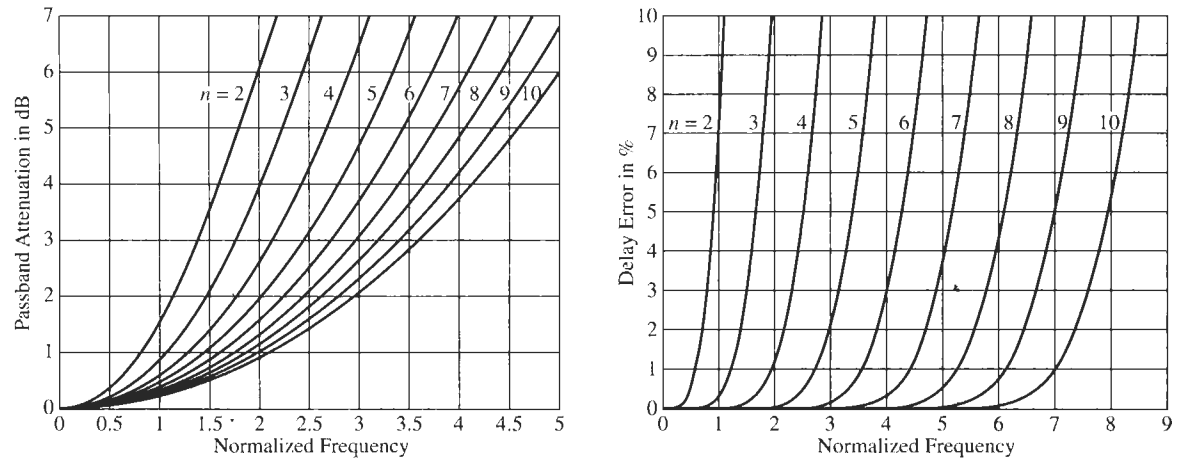

Figura 2: Tablas para el orden de un filtro Bessel según los requerimientos de la plantilla y la frecuencia normalizada
</center>

Siendo este de orden n = 3.

$$cotgh(s) = \dfrac{1}{s} + \dfrac{1}{\dfrac{3}{s} + \dfrac{1}{\dfrac{5}{s}}} = \dfrac{6s^2 + 15}{s^3 +15s} \Rightarrow T(s) = \dfrac{15}{s^3+6s^2+15s+15}$$

$$ T(s) = \frac{15}{(s+2,32)(s^2+3,68s+6,45)} = \frac{2,32}{s+2,32}  \frac{6,45}{s^2+3,68s+6,45} $$

Una vez obtenida la transferencia en SOS, del datasheet del integrado UAF42 se obtienen las ecuaciones de diseño.
Con éste, sólo se puede implementar la sección de segundo orden, para la de primer orden bastará con un etapa RC después.

## <u> Implementación con el circuito integrado UAF42 </u>
El objetivo de esta práctica es también aprender a implementar filtros con circuitos integrados activos, aprendiendo a usar lo que ofrecen como restricciones de diseño.
Se tiene:
<center>

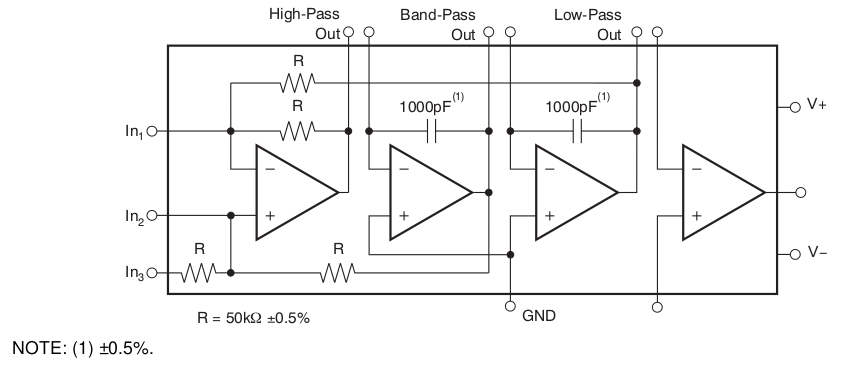

Figura 3: Esquemático simplificado del UAF42
</center>

<center>

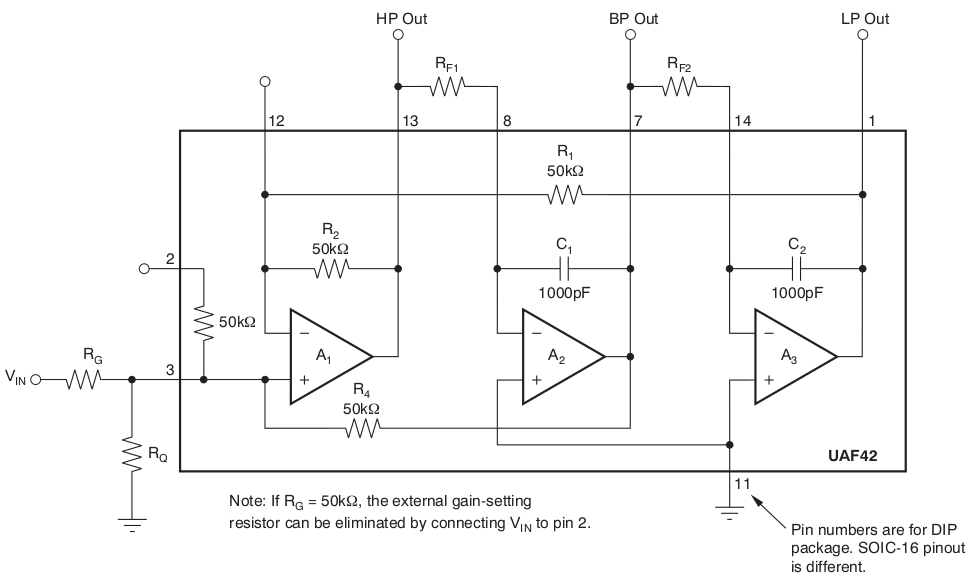

Figura 4: Esquemático detallado del UAF42
</center>

Y las ecuaciones de diseño:

<center>

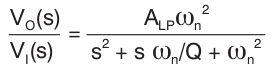

</center>

<center>

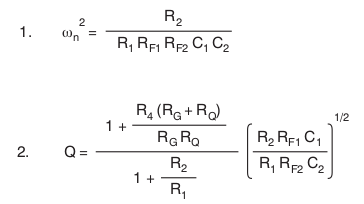

</center>

<center>

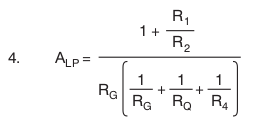

</center>

En el integrado se tiene $R_{1} = R_{2} = R_{4} = 50 K\Omega \pm 0.5 \% $ y se elige que $R_{G}$ también sea igual a las anteriores, lo cual habilita la entrada por el pin 2 aprovechando la resistencia que viene integrada dentro del circuito, con una tolerancia igual de buena que las mencionadas. También $C_{1} = C_{2} = 1000pF \pm 0.5 \% $.

$R_{Q}, R_{f_{1}}$ y $R_{f_{2}}$ son externas.

Se arma el siguiente set de ecuaciones reemplazando los valores en las ecuaciones de diseño:

$$\omega_{n}^2 = \dfrac{10^{18}}{R_{f_{1}}R_{f_{2}}} \qquad (1)$$

$$Q = \dfrac{1 + \dfrac{(50K\Omega + R_{Q})}{R_{Q}}}{2} \sqrt{\dfrac{R_{f_{1}}}{R_{f_{2}}}} \qquad (2)$$

$$A_{LP} = K = \dfrac{2}{1 + \dfrac{R_{G}}{R_{Q}} +  \dfrac{R_{G}}{50K \Omega}} \qquad (3)$$

Con ayuda de numpy se obtienen valores más precisos para la transferencia:
$$T(s) = \dfrac{2,322}{s+2,322} \dfrac{6,459}{s^2 + 3,678s + 6,459}$$

$$\omega_{0}^2 = 6,459$$
$$\dfrac{\omega_{0}}{Q} = 3,678 \Rightarrow Q = 0,691$$
$$K = \dfrac{2}{2 + \dfrac{50K\Omega}{R_{Q}}}$$

Desnormalizando:

$$\Omega_{\omega} = 2 \pi f$$
$$f = 2KHz$$
$$\omega_{n}^2 = (\omega_{0} \Omega_{\omega})^2 = 1020 M \dfrac{rad^2}{s^2} \Rightarrow \omega_{n} = 31936,88 \dfrac{rad}{s}$$
$$R_{f_{1}}R_{f_{2}} = \dfrac{10^{18}}{\omega_{n}^2} = 980,43*10^6$$

Se elige $R_{G} = 50K\Omega$ y $R_{Q} = 30,8K\Omega$, despeja $R_{f_{1}}$ de (1) para reemplazarla en (2):

$$ Q = 1,812 \sqrt{\dfrac{R_{f_{1}}}{R_{f_{2}}}} = 1,812 \sqrt{\dfrac{10^{18}}{\omega_{n}^2 R_{f_{2}}^2}} = 0,691$$
$$ 1,812 \dfrac{10^9}{\omega_{n} R_{f_{2}}} = 0,691 \rightarrow R_{f{2}} = 82,108K\Omega \rightarrow R_{f{1}} = 11,94K\Omega$$
$$ K = 0,552 $$

Como se ve, para estos valores la salida estaría un poco atenuada, para corregir esto después se implementó una etapa de ganancia en configuración no inversora con un amplificador operacional libre extra que traía el circuito integrado. Experimentalmente, se concluyó que tendría que tener una ganancia aproximada de 5dB (1,78 veces) para poder estar en 0dB en la banda de paso:

$$K_{op} = 1 + \dfrac{R_{k_{1}}}{R_{k{2}}} = 1,78 \rightarrow R_{k_{2}} = 0,78 R_{k_{1}}$$

$$R_{k_{1}} = 2,2K\Omega \rightarrow R_{k_{2}} = 1,7K\Omega \approx 1,8K\Omega$$

Para la etapa de orden uno se utilizó un RC con el capacitor en derivador siendo la salida. De esta configuración se sabe que la transferencia es:
$$T(s) = \dfrac{\frac{1}{RC}}{s+\frac{1}{RC}} $$

$$\dfrac{1}{RC} = 2,322$$
Normalizando:
$$\Omega_{z} = R \rightarrow R' = 1\ y\ C' = \dfrac{1}{2,322} = 0,431 $$
Desnormalizando:
$$C = \dfrac{C'}{\Omega_z \Omega_{\omega}} \rightarrow \Omega_z = \dfrac{C'}{C \Omega_{\omega}} $$
Se decidió usar un capacitor C = 100nF que se tenía a disposición:
$$ R = \Omega_z = 342,978 \Omega $$

Después de todos estos cálculos, se tiene por fin los valores de los componentes a usar.

## <u> Simulación numérica </u> ##
Como se mencionó antes, la transferencia fue corroborada por numpy. Acá se puede ver todo el filtro con detalle:

#### Función transferencia normalizada del filtro Bessel de orden 3

<IPython.core.display.Math object>

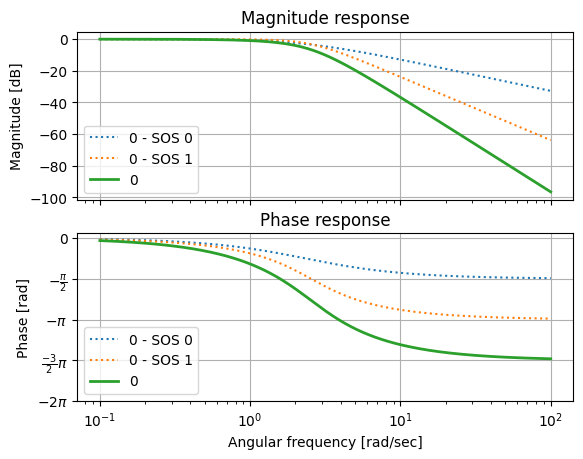

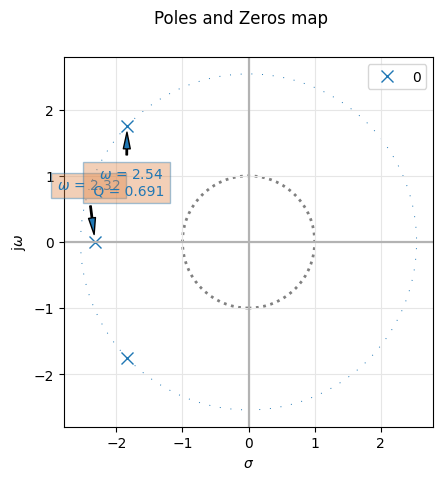

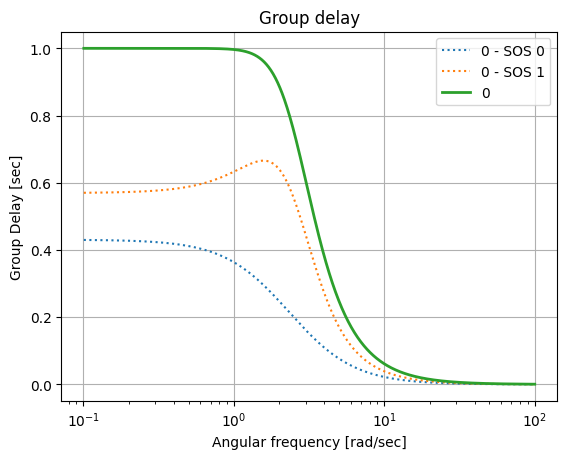

In [2]:
# importo librerias
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
#libreria de la catedra
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_SOS, tf2sos_analog
from pytc2.general import print_subtitle

pi = np.pi

#D = 80e-6
#norma_w = 1/D
##solo hace falta el orden

orden = 3

z, p, k = sig.besselap(orden, norm='delay')

num, den = sig.zpk2tf(z, p, k)
sos_lp = tf2sos_analog(num, den)
sos_lp[sos_lp < 1e-6] = 0.0
print_subtitle('Función transferencia normalizada del filtro Bessel de orden 3')
pretty_print_SOS(sos_lp, mode='omegayq')
analyze_sys(sos_lp)

## <u> Simulación circuital </u>

Se sintetizó el siguiente circuito:

<center>

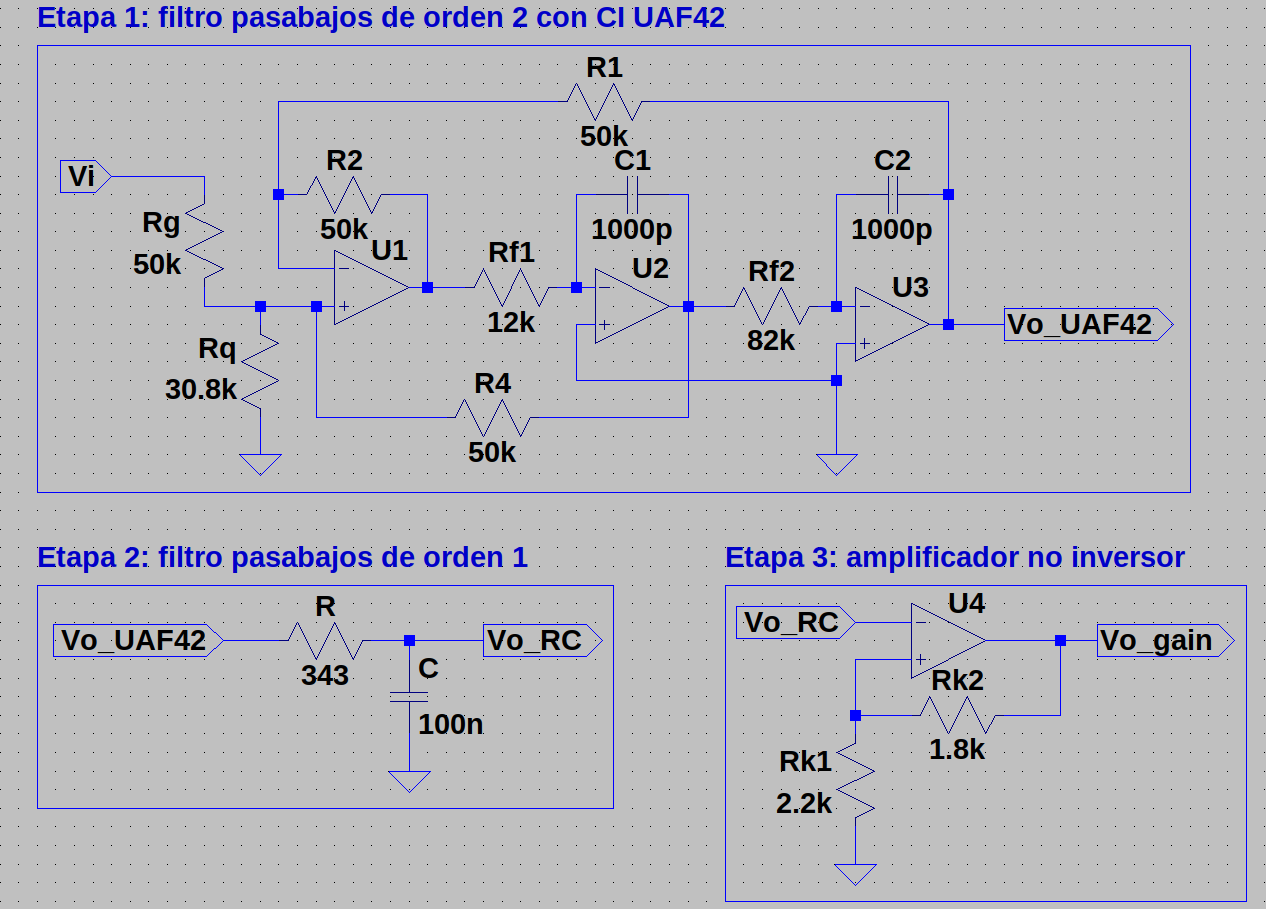

Figura 5: Diagrama por etapas del filtro
</center>

Se tiene la primer etapa que es un filtro pasabajos de orden 2 que se puede lograr con el integrado, después se conecta a una etapa pasabajos de orden 1 con componentes externos para lograr el filtro de orden 3. Finalmente, y como se mencionó antes, se ajusta la ganancia con un amplificador no inversor al final de la cadena.

El esquemático del circuito con la figura del UAF42 queda:

<center>

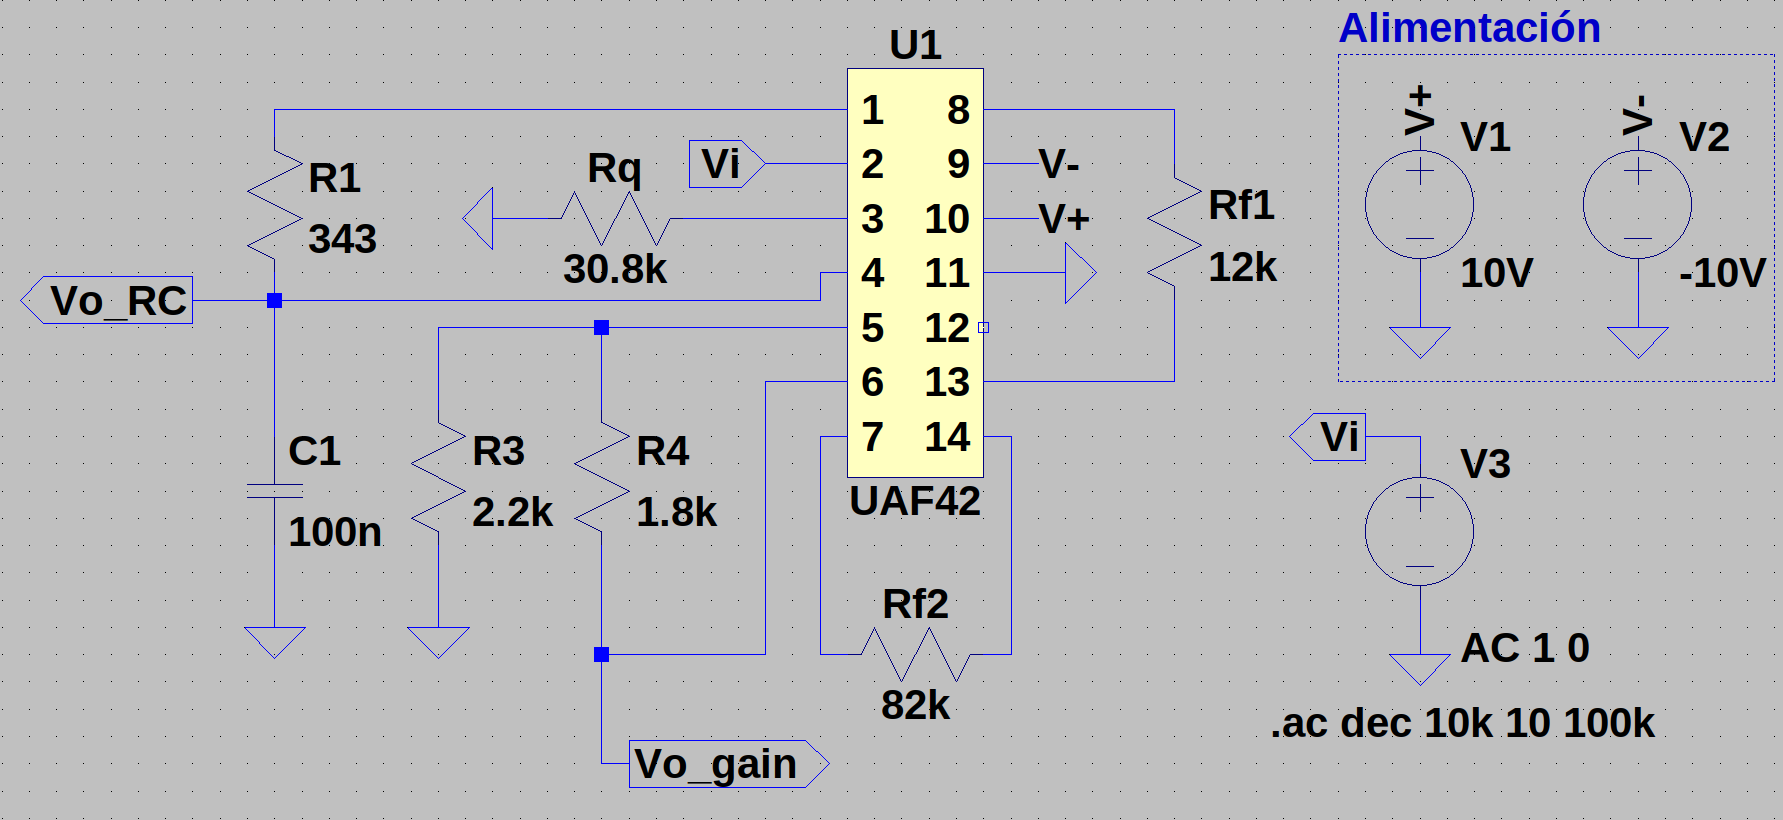

Figura 6: Circuito esquemático del filtro con UAF42
</center>

Por último, se simuló y se obtuvo el siguiente resultado:

<center>

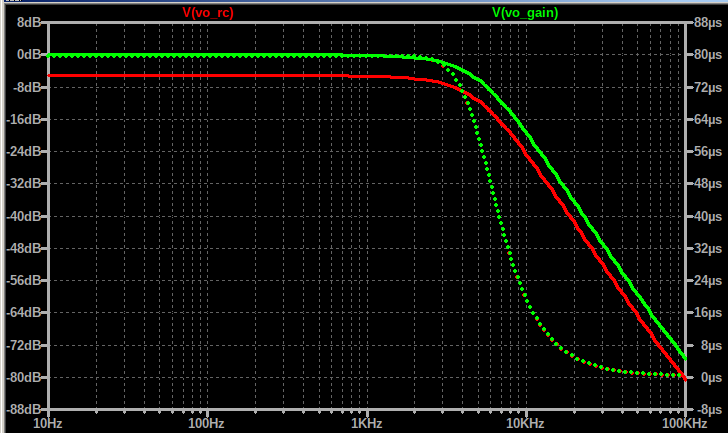

Figura 7: Respuesta en frecuencia y delay de grupo del filtro, con y sin ganancia
</center>

Dicho previamente, la ganancia asignada para tener aproximadamente 0dB en la banda de paso se obtuvo experimentalmente, es decir, se simuló primero y se fue iterando en cuentas para obtener valores de ganancia que "levantaran" la curva. Entonces, la salida con ganancia será la que se usará para las mediciones.

<center>

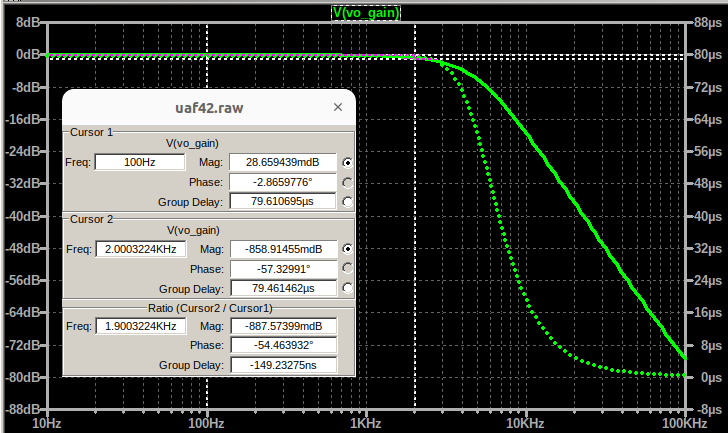

Figura 8: Mediciones de ganancia en la banda de paso y atenuación requerida por la plantilla
</center>

El filtro cumple con las exigencias en cuanto a ganancia de la plantilla, siendo que en la banda de paso tiene una ganancia de 28,6mdB (~0dB) y que a 2KHz la atenuación es de 0,86dB (menor a 1dB). 

Ahora, lo más importante de un filtro Bessel, es medir el delay de grupo:

<center>

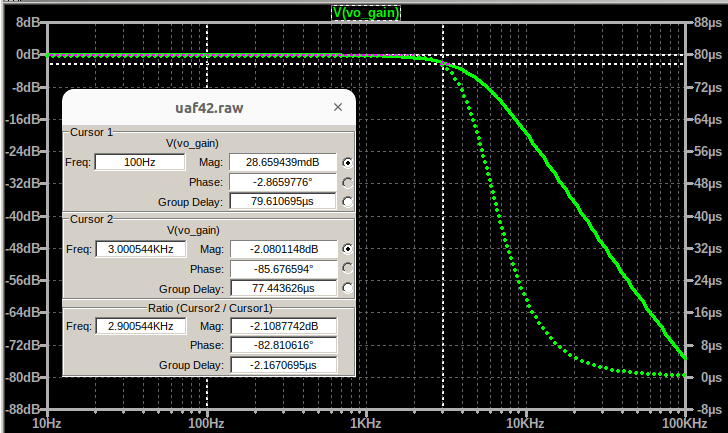

Figura 9: Mediciones del delay de grupo
</center>

En la banda de paso se tiene un desvío constante de $79,61\mu s$ $(\sim 80\mu s)$ y a 3KHz se tiene $77,44 \mu s$, o sea una variación menor al 5% ($\sim 4\mu s$), con lo cual el filtro cumple satisfactoriamente con toda la plantilla.


## <u> Armado físico del filtro </u>

Tras una exhaustiva verificación de cuentas y corroborar que no haya ningún error de cálculo o en las simulaciones, se procedió a armar el filtro en una placa universal.
Mención especial a mi compañero de grupo Elián Andrenacci que fue el encargado de soldar los componentes y colocar los soportes en las esquinas de la placa.
Para algunos valores de resistencias se tuvo que colocar un par en serie y para las demás se redondearon a valores comerciales cercanos como se puede haber notado en los esquemáticos anteriores.

Se usó un zócalo DIP14 facilitado por la facultad para conectar el integrado y se optó por no usar potenciómetros ya que los valores calculados eran fijos y las simulaciones arrojaban resultados satisfactorios.

Los pines de tierra, alimentación, entrada y salida fueron predispuestos de manera que sea cómoda la medición posterior en el laboratorio, además de los soportes para evitar el contacto directo de la placa con la superficie.

<center>

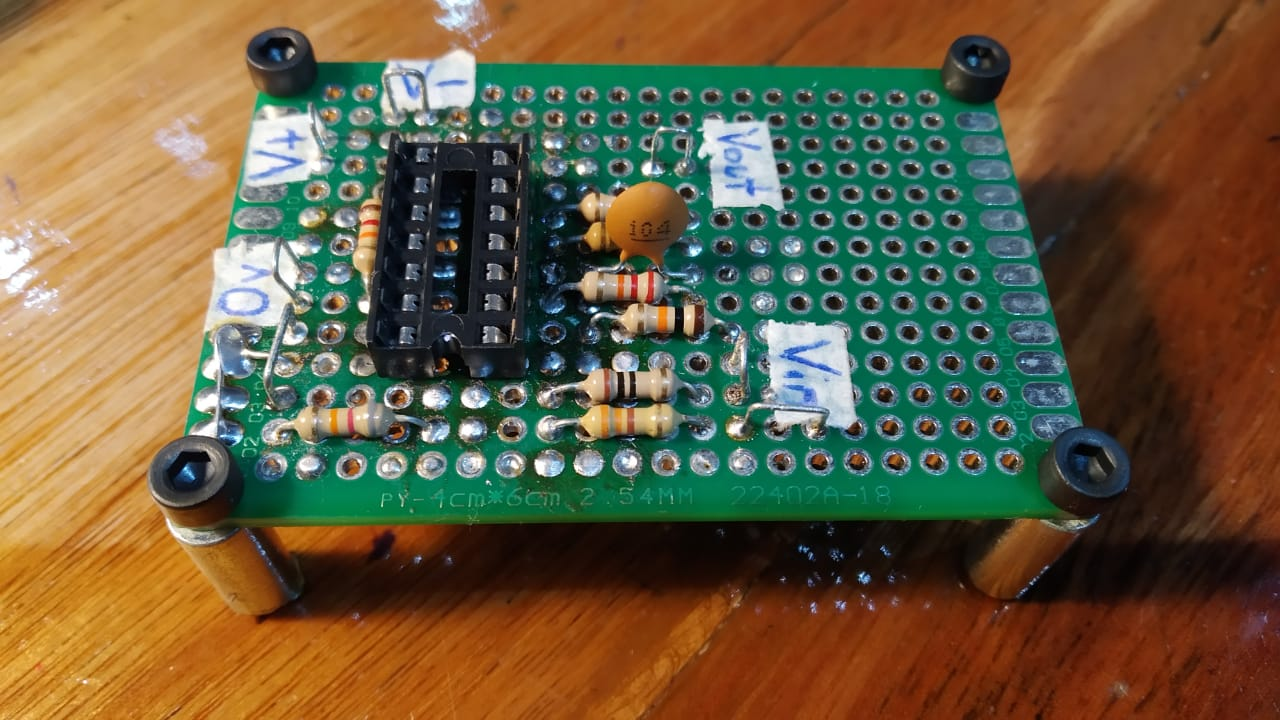

Figura 10: Imagen del PCB físico
</center>

## <u> Lista de componentes o Bill of Materials (BOM) </u> ##
<center>

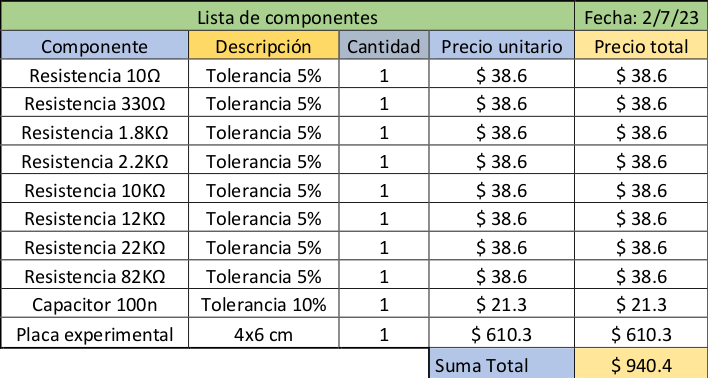

Figura 11: Tabla de componentes con precios en pesos argentinos para la fecha anotada
</center>

## <u> Mediciones </u> ##

Se utilizaron un generador de señales, osciloscopio y dos fuentes. 
Se realizó un barrido en frecuencia con una señal senoidal y se medía tanto la amplitud de las dos señales como el desfasaje entre ellas.

Para confiscar una tabla y re-armar los gráficos de módulo y fase se tienen los siguientes cálculos:

$$ Módulo: \quad |H(\omega)| = \dfrac{V_{oRMS}(\omega)}{V_{iRMS}(\omega)} $$
$$ Fase: \quad \theta(\omega) = \dfrac{RetardoFase(\omega)}{T(\omega)} * 360° \quad donde\quad T(\omega) = \dfrac{1}{2\pi \omega} $$
$$ Group \, Delay: \quad G_D(\omega) = - \dfrac{\partial RetardoFase(\omega)}{\partial \omega} = - \dfrac{RetardoFase(\omega_{i+1}) - RetardoFase(\omega_i)}{\omega_{i+1} - \omega_i} $$

#### <u> Ensayo del circuito </u> ####

Para polarizar al circuito integrado de tal manera que nos de el mejor resultado se leyó el datasheet de éste y se decidió que +/- 15V era lo adecuado.

La magnitud de la señal senoidal de entrada tendría que ser un par de volts por debajo de la de alimentación, por lo que se optó por 10V pico a pico.

El diagrama con la predisposición de los elementos de laboratorio es el siguiente:

<center>

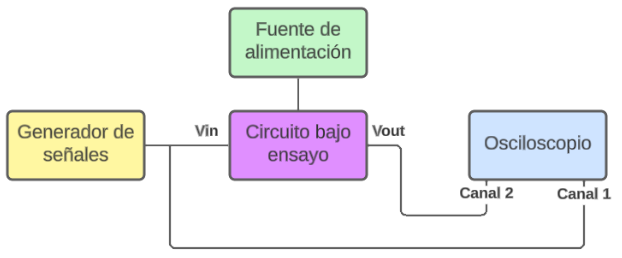

Figura 12: Bloques de las conexiones del circuito
</center>

Con fines de seguridad se limita la corrriente de la fuente de alimentación a 20mA y luego se setea la tensión a 15V. Después se calibran las puntas del osciloscopio con atenuación x10, se configura que los canales estén sin acoplamiento y que las medidas se hagan con un promedio de 16 muestras, además se mide que el generador de señales entregue correctamente la señal deseada (senoidal 10Vpp). Se apaga todo y el paso siguiente es conectar todas las puntas al circuito para encender todo de nuevo y comenzar con las mediciones.

#### <u> Resultados </u> ####
El canal 1 es el de trazo amarillo (entrada) y el canal 2 es el de trazo azul (salida).

Se adjuntan algunas imágenes tomadas del osciloscopio:

<center>

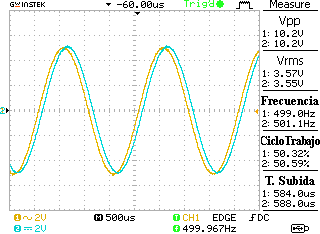

Figura 13: Señal de entrada vs señal de salida a 500Hz (mitad de la banda de paso)
</center>

Se puede apreciar la ganancia unitaria de la banda de paso.

<center>

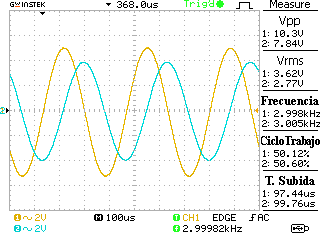

Figura 14: Señal de entrada vs señal de salida a 3KHz (frecuencia de corte)
</center>

Cae 1,04dB, cumpliendo con la plantilla que requería 1dB.

<center>

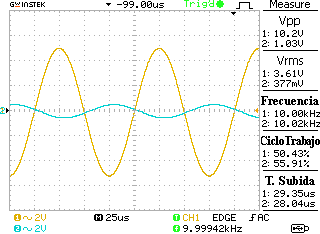

Figura 15: Señal de entrada vs señal de salida a 10KHz
</center>

Se comprueba el comportamiento de pasabajos, a 10KHz atenúa aproximadamente 20dB.

Pero por lo que destaca un filtro Bessel no es por su forma de módulo si no por su forma de retardo de grupo, se adjuntan algunas mediciones de esto. 

Cabe destacar que fue complicado medirlo bien por la incertidumbre del instrumento, se hizo midiendo con los cursores el cruce por cero de ambas señales.

<center>

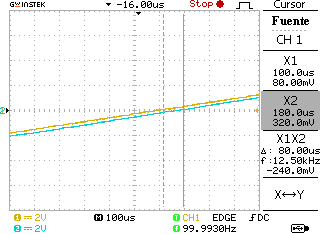

Figura 16: Desfasaje a 100Hz
</center>

<center>

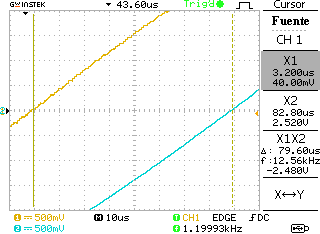

Figura 17: Desfasaje a 1,2KHz
</center>

<center>

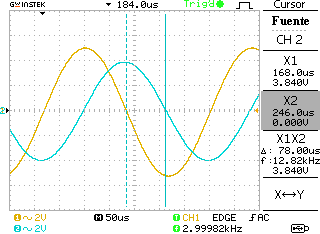

Figura 18: Desfasaje a 3KHz
</center>


De las figuras 16 y 17 se puede ver que el retardo de grupo se mantiene casi constante ($79,6 \mu s \sim 80 \mu s $), a 3KHz (frecuencia de corte) cae a $78\mu s$ con lo cual aún en la práctica se mantiene firme ante las exigencias de la plantilla.

A medida que se tomaban estas imágenes también se tomaron valores para confiscar una tabla en excel que luego permitió elaborar los siguientes gráficos para re-crear lo obtenido en las simulaciones.

<center>

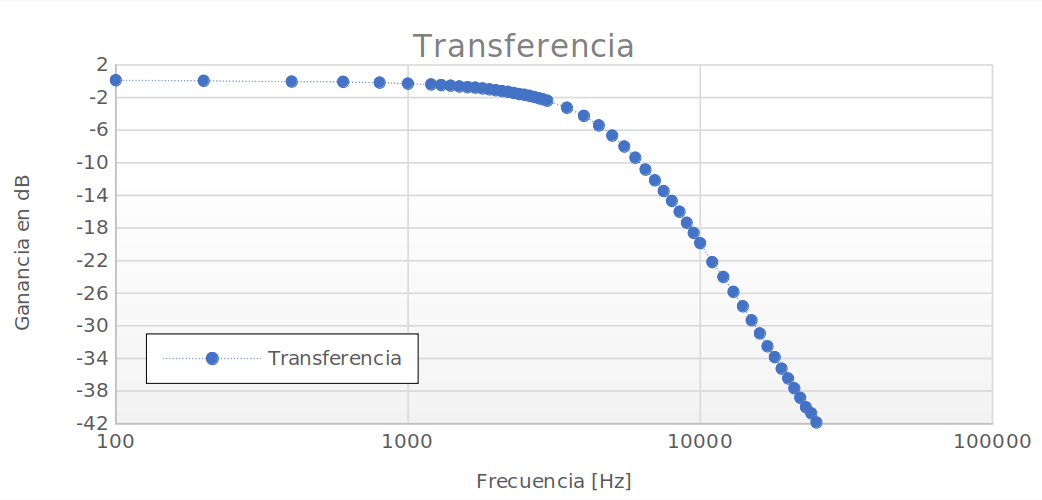

Figura 19: Transferencia en dB
</center>

<center>

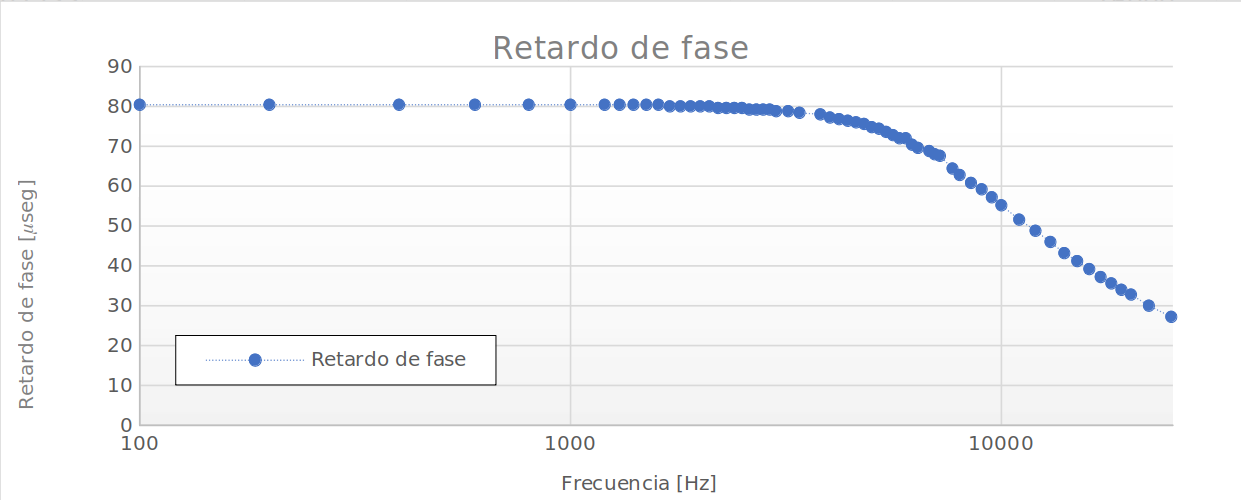

Figura 20: Retardo de fase
</center>

Con las expresiones anteriores se calcula la fase:

<center>

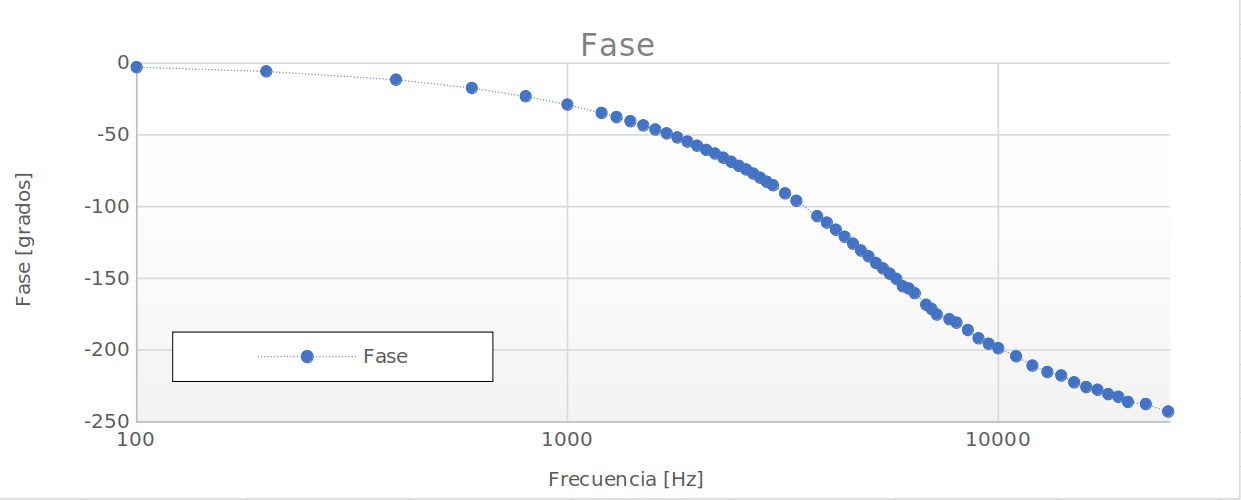

Figura 21: Fase
</center>

Y de igual manera se calcula el delay de grupo:

<center>

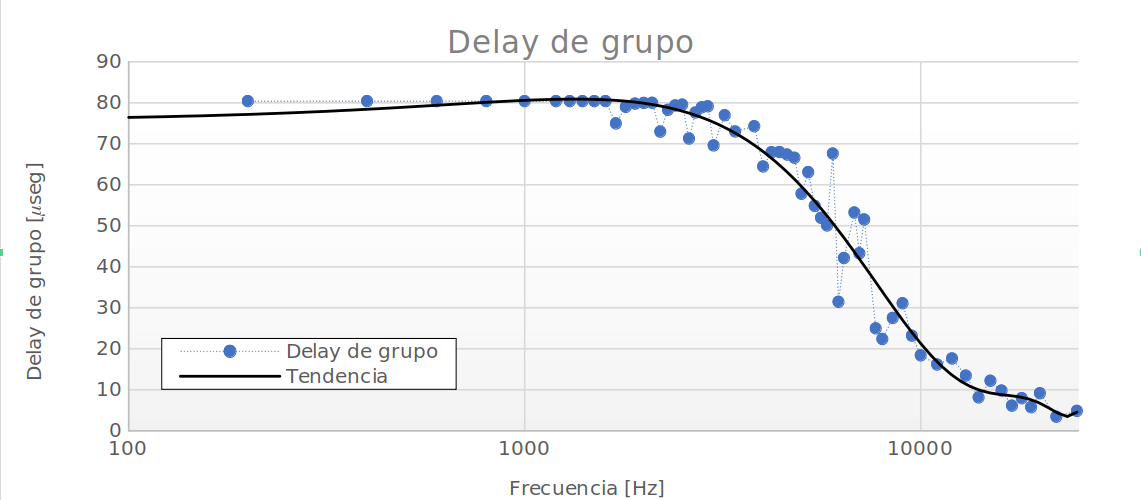

Figura 22: Delay de grupo
</center>

Obsérvese que los gráficos coinciden en mayor o menor medida que los simulados.

Es de destacar que el delay de grupo tiene ruido, por lo cual se dibujó encima una línea con la tendencia.

Después de la realización de estas mediciones se sometió el circuito al analizador de audio para unas mediciones nuevas mejores y más rápidas.

<center>

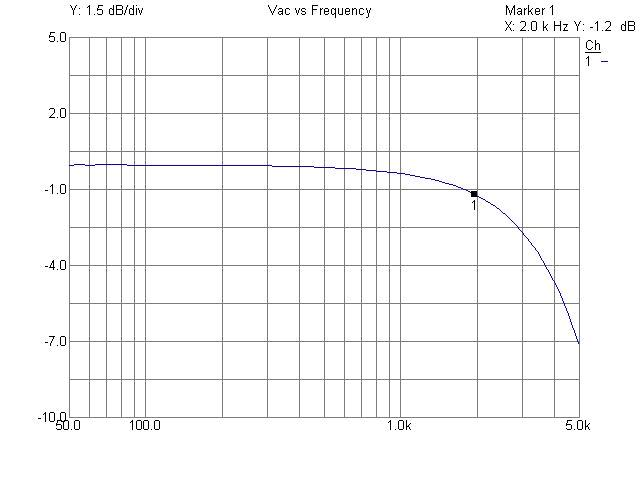

Figura 23: Transferencia medida con el analizador de audio
</center>

<center>

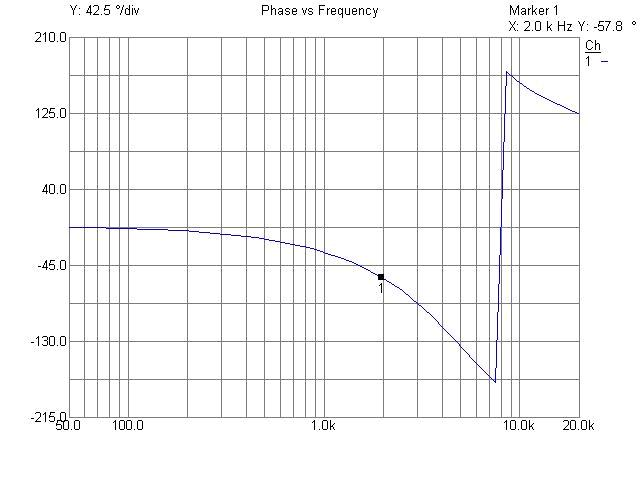

Figura 24: Fase medida con el analizador de audio
</center>

Fuimos informados por el ayudante que el pico en el gráfico de la fase fue un problema de la resolución del instrumento y no del circuito, por lo que una vez más se puso a prueba que el filtro sigue cumpliendo la plantilla.

## <u> Conclusiones </u> ##
Fue una interesante práctica, el desafío de diseñar con las restricciones que implica el circuito integrado utilizado fue una experiencia donde se aprende bastante y se consolidan los conocimientos teóricos plasmándolos en algo real.

La obtención de la transferencia no fue nada distinto a lo que se venía haciendo en la ejercitación, lo nuevo estaba en cumplir y diseñar con los componentes que teníamos más a disposición en el grupo. El datasheet del UAF42 sirvió de mucho ya que con las ecuaciones de diseño sólo hacía falta igualar expresiones y reemplazar valores corroborando que se respetaran las relaciones, no hizo falta deducir ninguna expresión.

Hubo buena sinergia en el equipo y propuestas distintas que plantearon diferentes puntos de vista para encarar el filtro pero se terminó haciendo una puesta en común y se fue al laboratorio abierto a probar lo acordado. En la primera oportunidad las cosas no salieron bien y se cree que puede ser por problemas de un integrado defectuoso o mala conexión en el protoboard prototipo; en la segunda oportunidad se logró el objetivo, consolidando incluso nuevos valores de componentes que mejoraban el desempeño del filtro.

En cuanto a las mediciones y los gráficos obtenidos en base a ellas, se observa que en mayor o menor medida cumplen con lo simulado (lo ideal) y se encuentran dentro de las exigencias de la plantilla. Por supuesto, hay desvíos en algunos gráficos por toma de mediciones con incertidumbre o error humano pero en líneas generales trazando una curva de tendencia (por ejemplo, el gráfico de retardo de grupo que tiene ruido) se obtienen las formas de curva esperadas de un filtro de estas características.

Personalmente, me llevé una gran experiencia y aprendí mucho, sobre todo el manejo correcto y toma de mediciones con los instrumentos del laboratorio. EL analizador de audio me sorprendió, desde su rapidez para efectuar las curvas que a nuestro equipo le tomó toda la clase del laboratorio hasta su simple existencia, de la cual desconocía.

Entre los problemas enfrentados se tiene: disposición no tan cómoda de componentes para medir en la placa, errores de cálculo de componentes y desconocimiento de mediciones de fase (que se consultó al cuerpo docente y se aprendió satisfactoriamente), pero se pudieron sortear al final y se aprendió de ellos. Con más seguridad hay menos probabilidad de que pasemos por lo mismo en algún otro futuro laboratorio.
